In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv("../data/delaney-mordred.csv")
X = df.loc[:, df.columns.str.startswith("mordred_")]
y = df["logS"]
sc = StandardScaler()
X_std = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_std, y)
print(X_train.shape, X_test.shape)

(846, 1613) (282, 1613)


In [2]:
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error

def objective(trial):

    param = {
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
    }

    kf = KFold(n_splits=5, random_state=42, shuffle=True)
    mae = []
    scores = []
    for i, (train_index, val_index) in enumerate(kf.split(X_train)):
        X_tr, X_val = X_train[train_index], X_train[val_index]
        y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]
        model = LGBMRegressor(**param)
        model.fit(X_tr, y_tr)
        y_val_pred = model.predict(X_val)
        mae_val = mean_absolute_error(y_val, y_val_pred)
        mae.append(mae_val)
    return sum(mae)/len(mae)


In [3]:
import optuna
study = optuna.create_study()
study.optimize(objective, n_trials = 10)

[I 2023-12-20 16:05:30,534] A new study created in memory with name: no-name-ecfc618e-c021-47cd-8b39-db288b783f60
/tmp/ipykernel_18480/109040685.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
/tmp/ipykernel_18480/109040685.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
/tmp/ipykernel_18480/109040685.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('

[LightGBM] [Warning] feature_fraction is set=0.4443925385459605, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4443925385459605
[LightGBM] [Warning] lambda_l2 is set=8.678142990338623e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.678142990338623e-05
[LightGBM] [Warning] lambda_l1 is set=2.938666893943815e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.938666893943815e-05
[LightGBM] [Warning] bagging_fraction is set=0.6722909955689143, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6722909955689143
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.4443925385459605, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4443925385459605
[LightGBM] [Warning] lambda_l2 is set=8.678142990338623e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.678142990338623e-05
[LightGBM] [Warnin

[I 2023-12-20 16:05:47,122] Trial 0 finished with value: 0.5636524482700899 and parameters: {'lambda_l1': 2.938666893943815e-05, 'lambda_l2': 8.678142990338623e-05, 'num_leaves': 202, 'feature_fraction': 0.4443925385459605, 'bagging_fraction': 0.6722909955689143, 'bagging_freq': 4, 'min_child_samples': 98}. Best is trial 0 with value: 0.5636524482700899.


[LightGBM] [Warning] feature_fraction is set=0.4443925385459605, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4443925385459605
[LightGBM] [Warning] lambda_l2 is set=8.678142990338623e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.678142990338623e-05
[LightGBM] [Warning] lambda_l1 is set=2.938666893943815e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.938666893943815e-05
[LightGBM] [Warning] bagging_fraction is set=0.6722909955689143, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6722909955689143
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.9022725957238212, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9022725957238212
[LightGBM] [Warning] lambda_l2 is set=0.00010418421209961953, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00010418421209961953
[LightGBM] [Warn

/tmp/ipykernel_18480/109040685.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
/tmp/ipykernel_18480/109040685.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
/tmp/ipykernel_18480/109040685.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
/tmp/ipykernel_18480/109040685.py:12: FutureWarning: suggest_uniform has been deprec

[LightGBM] [Warning] feature_fraction is set=0.9022725957238212, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9022725957238212
[LightGBM] [Warning] lambda_l2 is set=0.00010418421209961953, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00010418421209961953
[LightGBM] [Warning] lambda_l1 is set=0.7145149151544927, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7145149151544927
[LightGBM] [Warning] bagging_fraction is set=0.7142633852087086, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7142633852087086
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.061445 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 213630
[LightGBM] [Info] Number of data points in the train set: 676, number of used features: 1222
[LightGBM] [Info] Start t

[I 2023-12-20 16:05:56,997] Trial 1 finished with value: 0.4721414411653873 and parameters: {'lambda_l1': 0.7145149151544927, 'lambda_l2': 0.00010418421209961953, 'num_leaves': 62, 'feature_fraction': 0.9022725957238212, 'bagging_fraction': 0.7142633852087086, 'bagging_freq': 6, 'min_child_samples': 34}. Best is trial 1 with value: 0.4721414411653873.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.9022725957238212, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9022725957238212
[LightGBM] [Warning] lambda_l2 is set=0.00010418421209961953, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00010418421209961953
[LightGBM] [Warning] lambda_l1 is set=0.7145149151544927, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7145149151544927
[LightGBM] [Warning] bagging_fraction is set=0.7142633852087086, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7142633852087086
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.43667882996283375, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.43667882996283375
[LightGBM]

/tmp/ipykernel_18480/109040685.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
/tmp/ipykernel_18480/109040685.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
/tmp/ipykernel_18480/109040685.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
/tmp/ipykernel_18480/109040685.py:12: FutureWarning: suggest_uniform has been deprec

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016556 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 213432
[LightGBM] [Info] Number of data points in the train set: 676, number of used features: 1199
[LightGBM] [Info] Start training from score -3.089253
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[I 2023-12-20 16:05:59,351] Trial 2 finished with value: 0.5667504708152763 and parameters: {'lambda_l1': 1.2647929751965193e-08, 'lambda_l2': 0.00011275173395107531, 'num_leaves': 4, 'feature_fraction': 0.43667882996283375, 'bagging_fraction': 0.49663378701911653, 'bagging_freq': 1, 'min_child_samples': 73}. Best is trial 1 with value: 0.4721414411653873.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/tmp/ipykernel_18480/109040685.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
/tmp/ipykernel_18480/109040685.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
/tmp/ipykernel_18480/109040685.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
/tmp/ipykernel_18480/109040685.py:12: FutureWarning: suggest_uniform has been deprec

[LightGBM] [Warning] feature_fraction is set=0.6047551223996498, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6047551223996498
[LightGBM] [Warning] lambda_l2 is set=1.7928690597795852e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7928690597795852e-07
[LightGBM] [Warning] lambda_l1 is set=6.214103288701036e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.214103288701036e-07
[LightGBM] [Warning] bagging_fraction is set=0.5979384367852804, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5979384367852804
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.037808 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 214029
[LightGBM] [Info] Number of data points in the train set: 676, number of used features: 1271
[LightGBM] [Info] S

[I 2023-12-20 16:06:16,795] Trial 3 finished with value: 0.46208963227724115 and parameters: {'lambda_l1': 6.214103288701036e-07, 'lambda_l2': 1.7928690597795852e-07, 'num_leaves': 181, 'feature_fraction': 0.6047551223996498, 'bagging_fraction': 0.5979384367852804, 'bagging_freq': 4, 'min_child_samples': 20}. Best is trial 3 with value: 0.46208963227724115.


[LightGBM] [Warning] feature_fraction is set=0.6047551223996498, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6047551223996498
[LightGBM] [Warning] lambda_l2 is set=1.7928690597795852e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7928690597795852e-07
[LightGBM] [Warning] lambda_l1 is set=6.214103288701036e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.214103288701036e-07
[LightGBM] [Warning] bagging_fraction is set=0.5979384367852804, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5979384367852804
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5777455653442265, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5777455653442265
[LightGBM] [Warning] lambda_l2 is set=0.001973326183436585, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001973326183436585
[LightGBM] [Warnin

/tmp/ipykernel_18480/109040685.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
/tmp/ipykernel_18480/109040685.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
/tmp/ipykernel_18480/109040685.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
/tmp/ipykernel_18480/109040685.py:12: FutureWarning: suggest_uniform has been deprec

[LightGBM] [Warning] feature_fraction is set=0.5777455653442265, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5777455653442265
[LightGBM] [Warning] lambda_l2 is set=0.001973326183436585, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001973326183436585
[LightGBM] [Warning] lambda_l1 is set=0.011362012072828684, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.011362012072828684
[LightGBM] [Warning] bagging_fraction is set=0.5583982059751069, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5583982059751069
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.082475 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 213048
[LightGBM] [Info] Number of data points in the train set: 676, number of used features: 1174
[LightGBM] [Info] Start t

[I 2023-12-20 16:06:22,390] Trial 4 finished with value: 0.5886323636491188 and parameters: {'lambda_l1': 0.011362012072828684, 'lambda_l2': 0.001973326183436585, 'num_leaves': 45, 'feature_fraction': 0.5777455653442265, 'bagging_fraction': 0.5583982059751069, 'bagging_freq': 5, 'min_child_samples': 95}. Best is trial 3 with value: 0.46208963227724115.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.5777455653442265, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5777455653442265
[LightGBM] [Warning] lambda_l2 is set=0.001973326183436585, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001973326183436585
[LightGBM] [Warning] lambda_l1 is set=0.011362012072828684, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.011362012072828684
[LightGBM] [Warning] bagging_fraction is set=0.5583982059751069, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5583982059751069
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warn

/tmp/ipykernel_18480/109040685.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
/tmp/ipykernel_18480/109040685.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
/tmp/ipykernel_18480/109040685.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
/tmp/ipykernel_18480/109040685.py:12: FutureWarning: suggest_uniform has been deprec

[LightGBM] [Warning] feature_fraction is set=0.8694427601813659, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8694427601813659
[LightGBM] [Warning] lambda_l2 is set=1.2699510525803906e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2699510525803906e-05
[LightGBM] [Warning] lambda_l1 is set=3.655135417834131e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.655135417834131e-05
[LightGBM] [Warning] bagging_fraction is set=0.6322307122309376, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6322307122309376
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047264 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 213479
[LightGBM] [Info] Number of data points in the t

[I 2023-12-20 16:06:33,849] Trial 5 finished with value: 0.5070646788972906 and parameters: {'lambda_l1': 3.655135417834131e-05, 'lambda_l2': 1.2699510525803906e-05, 'num_leaves': 198, 'feature_fraction': 0.8694427601813659, 'bagging_fraction': 0.6322307122309376, 'bagging_freq': 7, 'min_child_samples': 59}. Best is trial 3 with value: 0.46208963227724115.
/tmp/ipykernel_18480/109040685.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
/tmp/ipykernel_18480/109040685.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
/tmp/ipykernel_18480/1090

[LightGBM] [Warning] feature_fraction is set=0.7566893707003663, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7566893707003663
[LightGBM] [Warning] lambda_l2 is set=5.265978221754179, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.265978221754179
[LightGBM] [Warning] lambda_l1 is set=6.432855099183216e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.432855099183216e-08
[LightGBM] [Warning] bagging_fraction is set=0.9075646721836519, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9075646721836519
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7566893707003663, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7566893707003663
[LightGBM] [Warning] lambda_l2 is set=5.265978221754179, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.265978221754179
[LightGBM] [Warning] lambda_l1 is 

[I 2023-12-20 16:06:45,143] Trial 6 finished with value: 0.4740450806832179 and parameters: {'lambda_l1': 6.432855099183216e-08, 'lambda_l2': 5.265978221754179, 'num_leaves': 154, 'feature_fraction': 0.7566893707003663, 'bagging_fraction': 0.9075646721836519, 'bagging_freq': 3, 'min_child_samples': 61}. Best is trial 3 with value: 0.46208963227724115.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.7566893707003663, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7566893707003663
[LightGBM] [Warning] lambda_l2 is set=5.265978221754179, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.265978221754179
[LightGBM] [Warning] lambda_l1 is set=6.432855099183216e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.432855099183216e-08
[LightGBM] [Warning] bagging_fraction is set=0.9075646721836519, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9075646721836519
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning]

/tmp/ipykernel_18480/109040685.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
/tmp/ipykernel_18480/109040685.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
/tmp/ipykernel_18480/109040685.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
/tmp/ipykernel_18480/109040685.py:12: FutureWarning: suggest_uniform has been deprec

[LightGBM] [Warning] feature_fraction is set=0.7561167887643048, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7561167887643048
[LightGBM] [Warning] lambda_l2 is set=0.10061195532526468, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10061195532526468
[LightGBM] [Warning] lambda_l1 is set=1.0560558145977807e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0560558145977807e-07
[LightGBM] [Warning] bagging_fraction is set=0.858520268733562, subsample=1.0 will be ignored. Current value: bagging_fraction=0.858520268733562
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.186280 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 213816
[LightGBM] [Info] Number of data points in the train set: 676, number of used features: 1242
[LightGBM] [Info] Start t

[I 2023-12-20 16:07:04,654] Trial 7 finished with value: 0.4521376377500155 and parameters: {'lambda_l1': 1.0560558145977807e-07, 'lambda_l2': 0.10061195532526468, 'num_leaves': 55, 'feature_fraction': 0.7561167887643048, 'bagging_fraction': 0.858520268733562, 'bagging_freq': 2, 'min_child_samples': 31}. Best is trial 7 with value: 0.4521376377500155.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.7561167887643048, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7561167887643048
[LightGBM] [Warning] lambda_l2 is set=0.10061195532526468, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10061195532526468
[LightGBM] [Warning] lambda_l1 is set=1.0560558145977807e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0560558145977807e-07
[LightGBM] [Warning] bagging_fraction is set=0.858520268733562, subsample=1.0 will be ignored. Current value: bagging_fraction=0.858520268733562
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.9634823578245769, colsample_bytree=1.0 will 

/tmp/ipykernel_18480/109040685.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
/tmp/ipykernel_18480/109040685.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
/tmp/ipykernel_18480/109040685.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
/tmp/ipykernel_18480/109040685.py:12: FutureWarning: suggest_uniform has been deprec

[LightGBM] [Warning] feature_fraction is set=0.9634823578245769, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9634823578245769
[LightGBM] [Warning] lambda_l2 is set=9.806568196140244, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.806568196140244
[LightGBM] [Warning] lambda_l1 is set=0.0277018427889777, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0277018427889777
[LightGBM] [Warning] bagging_fraction is set=0.8520000010255108, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8520000010255108
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.051193 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 213215
[LightGBM] [Info] Number of data points in the train set: 676, number of used features: 1184
[LightGBM] [Info] Start training fr

[I 2023-12-20 16:07:12,763] Trial 8 finished with value: 0.5061507103332642 and parameters: {'lambda_l1': 0.0277018427889777, 'lambda_l2': 9.806568196140244, 'num_leaves': 253, 'feature_fraction': 0.9634823578245769, 'bagging_fraction': 0.8520000010255108, 'bagging_freq': 3, 'min_child_samples': 81}. Best is trial 7 with value: 0.4521376377500155.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.9634823578245769, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9634823578245769
[LightGBM] [Warning] lambda_l2 is set=9.806568196140244, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.806568196140244
[LightGBM] [Warning] lambda_l1 is set=0.0277018427889777, reg_alpha=0.0 will be ignored. Current value: lambda_l1=

/tmp/ipykernel_18480/109040685.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
/tmp/ipykernel_18480/109040685.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
/tmp/ipykernel_18480/109040685.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
/tmp/ipykernel_18480/109040685.py:12: FutureWarning: suggest_uniform has been deprec

[LightGBM] [Warning] feature_fraction is set=0.6532417881639638, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6532417881639638
[LightGBM] [Warning] lambda_l2 is set=3.118762222656353e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.118762222656353e-08
[LightGBM] [Warning] lambda_l1 is set=0.03797272024833759, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03797272024833759
[LightGBM] [Warning] bagging_fraction is set=0.8993125262618911, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8993125262618911
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.050014 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 213486
[LightGBM] [Info] Number of data points in the train set: 676, number of used features: 1205
[LightGBM] [Info] Start t

[I 2023-12-20 16:07:20,505] Trial 9 finished with value: 0.4655057743339791 and parameters: {'lambda_l1': 0.03797272024833759, 'lambda_l2': 3.118762222656353e-08, 'num_leaves': 60, 'feature_fraction': 0.6532417881639638, 'bagging_fraction': 0.8993125262618911, 'bagging_freq': 1, 'min_child_samples': 49}. Best is trial 7 with value: 0.4521376377500155.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.6532417881639638, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6532417881639638
[LightGBM] [Warning] lambda_l2 is set=3.118762222656353e-08, reg_lambda=0.0 will be ignored. Cur

In [4]:
df = study.trials_dataframe() # pandasのDataFrame形式
print(df.head())

   number     value             datetime_start          datetime_complete  \
0       0  0.563652 2023-12-20 16:05:30.537598 2023-12-20 16:05:47.118321   
1       1  0.472141 2023-12-20 16:05:47.128866 2023-12-20 16:05:56.996731   
2       2  0.566750 2023-12-20 16:05:56.998325 2023-12-20 16:05:59.350081   
3       3  0.462090 2023-12-20 16:05:59.354320 2023-12-20 16:06:16.793928   
4       4  0.588632 2023-12-20 16:06:16.798462 2023-12-20 16:06:22.389157   

                duration  params_bagging_fraction  params_bagging_freq  \
0 0 days 00:00:16.580723                 0.672291                    4   
1 0 days 00:00:09.867865                 0.714263                    6   
2 0 days 00:00:02.351756                 0.496634                    1   
3 0 days 00:00:17.439608                 0.597938                    4   
4 0 days 00:00:05.590695                 0.558398                    5   

   params_feature_fraction  params_lambda_l1  params_lambda_l2  \
0                 0.444393

In [6]:
df["best_value"] = df["value"].cummin()

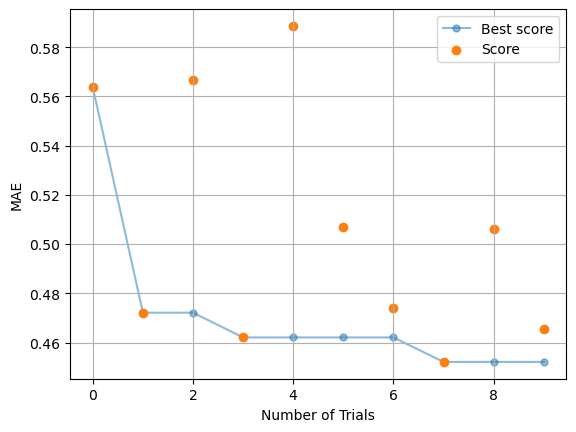

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(df["number"], df["best_value"], marker="o", ms=5, alpha=0.5, label="Best score", zorder=0)
ax.scatter(df["number"], df["value"], color="tab:orange", label="Score", zorder=1)
ax.set_xlabel("Number of Trials")
ax.set_ylabel("MAE")
ax.legend()
ax.grid(True)